In [1]:
import sys
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [2]:
kinan = pd.read_csv('kn.csv',index_col='Month', parse_dates=True, sep = ';')
print(kinan.shape)
print(kinan.head())

(24, 1)
             BJN
Month           
Jan-20  14929400
Jan-21  37455500
Feb-20  30327500
Feb-21  21770000
Mar-20  14536000


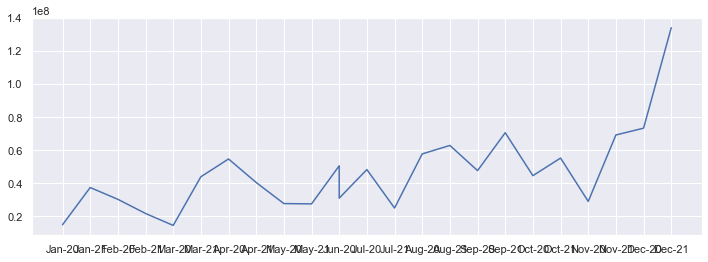

In [3]:
plt.figure(figsize=(12,4))
plt.plot(kinan.index, kinan['BJN'])

In [4]:
train = kinan[:14]
test = kinan[10:]

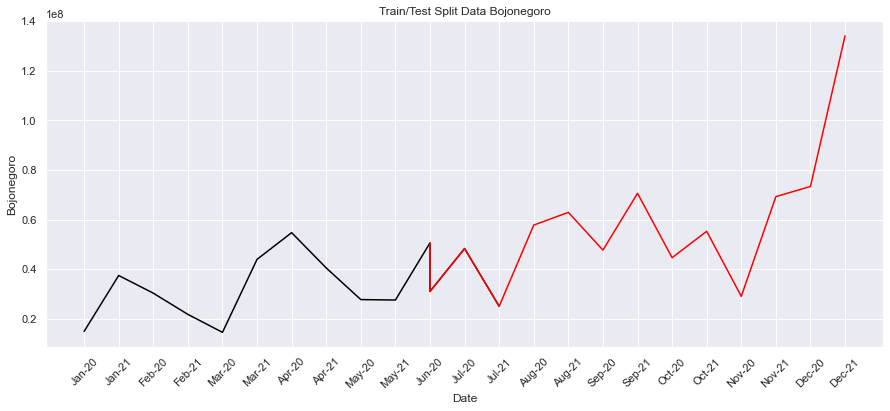

In [5]:
plt.figure(figsize=(15,6))
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Bojonegoro')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test Split Data Bojonegoro")
plt.show()

In [6]:
y = train['BJN']
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()
y_pred_ARMA = ARMAmodel.get_forecast(15)
y_pred_df_ARMA = y_pred_ARMA.conf_int(alpha = 0.05) 
y_pred_df_ARMA["Predictions"] = ARMAmodel.predict(start = y_pred_df_ARMA.index[0], end = y_pred_df_ARMA.index[-1])
y_pred_out_ARMA = y_pred_df_ARMA["Predictions"] 

In [7]:
y_pred_out_ARMA

14    3.428729e+07
15    3.407045e+07
16    3.385499e+07
17    3.364089e+07
18    3.342815e+07
19    3.321675e+07
20    3.300669e+07
21    3.279795e+07
22    3.259054e+07
23    3.238443e+07
24    3.217964e+07
25    3.197613e+07
26    3.177391e+07
27    3.157298e+07
28    3.137331e+07
Name: Predictions, dtype: float64

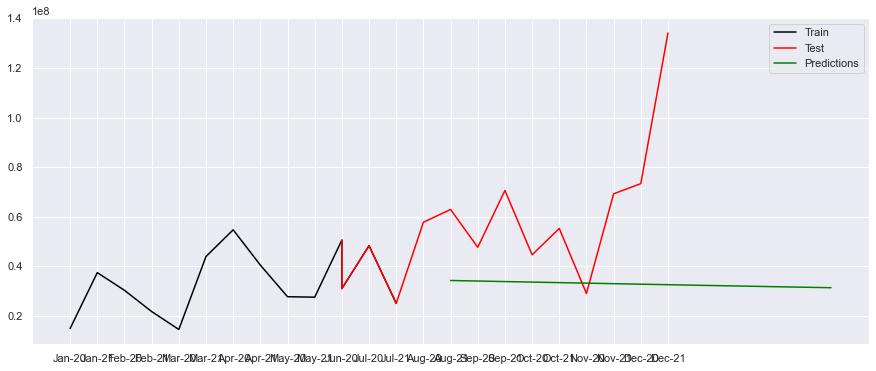

In [8]:
plt.figure(figsize=(15,6))
plt.plot(train, color = "black", label = "Train")
plt.plot(test, color = "red", label = "Test")
plt.plot(y_pred_out_ARMA, color='green', label = 'Predictions')
plt.legend()

In [9]:
arma_rmse = np.sqrt(mean_squared_error(y_pred_df_ARMA["Predictions"].values, y_pred_df_ARMA["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  0.0


In [10]:
ARIMAmodel = ARIMA(y, order = (1, 0, 1))
ARIMAmodel = ARIMAmodel.fit()

y_pred_ARIMA = ARIMAmodel.get_forecast(15)
y_pred_df_ARIMA = y_pred_ARIMA.conf_int(alpha = 0.05) 
y_pred_df_ARIMA["Predictions"] = ARIMAmodel.predict(start = y_pred_df_ARIMA.index[0], end = y_pred_df_ARIMA.index[-1])
y_pred_out_ARIMA = y_pred_df_ARIMA["Predictions"]

In [11]:
y_pred_out_ARIMA

14    3.111316e+07
15    3.164018e+07
16    3.204906e+07
17    3.236627e+07
18    3.261237e+07
19    3.280330e+07
20    3.295143e+07
21    3.306634e+07
22    3.315550e+07
23    3.322467e+07
24    3.327833e+07
25    3.331996e+07
26    3.335226e+07
27    3.337732e+07
28    3.339676e+07
Name: Predictions, dtype: float64

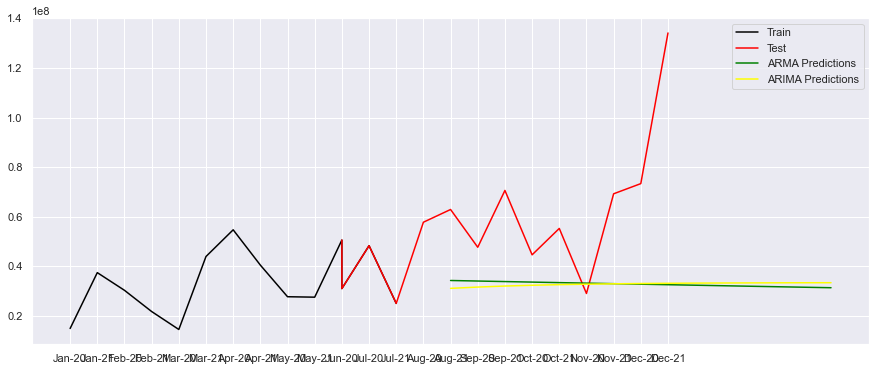

In [12]:
plt.figure(figsize=(15,6))
plt.plot(train, color = "black", label = "Train")
plt.plot(test, color = "red", label = "Test")
plt.plot(y_pred_out_ARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.legend()

In [13]:
arima_rmse = np.sqrt(mean_squared_error(y_pred_df_ARMA["Predictions"].values, y_pred_df_ARIMA["Predictions"]))
print("RMSE: ",arima_rmse)

RMSE:  1541823.3180234493


In [14]:
SARIMAXmodel = SARIMAX(y, order = (1, 0, 1), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred_SARIMA = SARIMAXmodel.get_forecast(15)
y_pred_df_SARIMA = y_pred_SARIMA.conf_int(alpha = 0.05) 
y_pred_df_SARIMA["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_SARIMA.index[0], end = y_pred_df_SARIMA.index[-1])
y_pred_out_SARIMA = y_pred_df_SARIMA["Predictions"] 

In [15]:
y_pred_out_SARIMA

14    4.549126e+07
15    3.265501e+07
16    2.180400e+07
17    6.594271e+07
18    8.209081e+07
19    6.074161e+07
20    4.161293e+07
21    4.134001e+07
22    7.589461e+07
23    4.653991e+07
24    8.171320e+07
25    1.264150e+07
26    6.065502e+07
27    4.354001e+07
28    2.907201e+07
Name: Predictions, dtype: float64

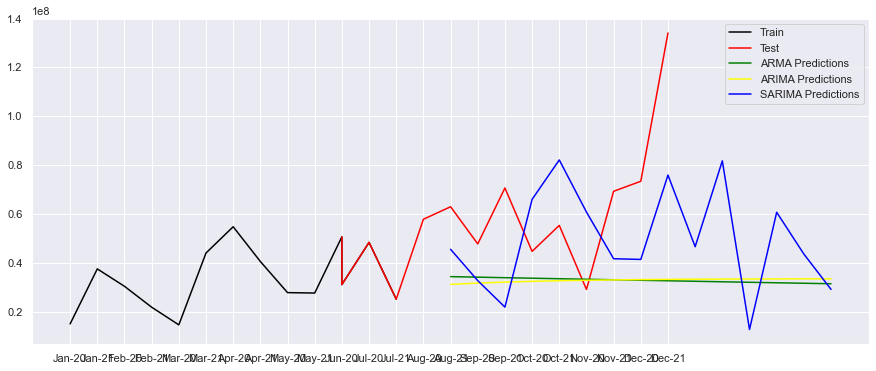

In [16]:
plt.figure(figsize=(15,6))
plt.plot(train, color = "black", label = "Train")
plt.plot(test, color = "red", label = "Test")
plt.plot(y_pred_out_ARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out_SARIMA, color='Blue', label = 'SARIMA Predictions')
plt.legend()